<a href="https://colab.research.google.com/github/gianna1490/master/blob/main/UNet_Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Course:-Deep-Learning" data-toc-modified-id="Course:-Deep-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Course</strong>: Deep Learning</a></span></li><li><span><a href="#Assignment-07:-Semantic-segmentation-with-U-Net" data-toc-modified-id="Assignment-07:-Semantic-segmentation-with-U-Net-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Assignment 07:</strong> Semantic segmentation with U-Net</a></span><ul class="toc-item"><li><span><a href="#Mount-Google-Drive-to-Google-Colab" data-toc-modified-id="Mount-Google-Drive-to-Google-Colab-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><strong>Mount Google Drive to Google Colab</strong></a></span></li><li><span><a href="#Load-packages-and-data" data-toc-modified-id="Load-packages-and-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><strong>Load packages and data</strong></a></span><ul class="toc-item"><li><span><a href="#Reading-the-dataset" data-toc-modified-id="Reading-the-dataset-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span><strong>Reading the dataset</strong></a></span></li><li><span><a href="#Train,-Validation-and-Test-sets" data-toc-modified-id="Train,-Validation-and-Test-sets-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span><strong>Train, Validation and Test sets</strong></a></span></li></ul></li><li><span><a href="#Data-Generator" data-toc-modified-id="Data-Generator-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><strong>Data Generator</strong></a></span></li><li><span><a href="#U-Net-with-Transpose-convolution" data-toc-modified-id="U-Net-with-Transpose-convolution-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><strong>U-Net with Transpose convolution</strong></a></span><ul class="toc-item"><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span><strong>Visualization</strong></a></span></li></ul></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><strong>Training the model</strong></a></span><ul class="toc-item"><li><span><a href="#Callbacks" data-toc-modified-id="Callbacks-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span><strong>Callbacks</strong></a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span><strong>Training</strong></a></span></li><li><span><a href="#TensorBoard-Dev" data-toc-modified-id="TensorBoard-Dev-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span><strong>TensorBoard Dev</strong></a></span></li></ul></li><li><span><a href="#Testing-the-model" data-toc-modified-id="Testing-the-model-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span><strong>Testing the model</strong></a></span></li><li><span><a href="#Unet-with-Unpooling" data-toc-modified-id="Unet-with-Unpooling-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Unet with Unpooling</a></span><ul class="toc-item"><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span><strong>Visualization</strong></a></span></li><li><span><a href="#Callbacks" data-toc-modified-id="Callbacks-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span><strong>Callbacks</strong></a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-2.7.3"><span class="toc-item-num">2.7.3&nbsp;&nbsp;</span><strong>Training</strong></a></span></li></ul></li></ul></li></ul></div>

<a href="https://colab.research.google.com/github/Deep-Learning-IGP-TUBS-SoSe2023/Group_D/blob/feature%2F007-segmentation-unet/Assignments/Assignment07/Assignment_07_Semantic_Segmentation_UNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Course**: Deep Learning

[<img align="right" width="400" height="100" src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg">](https://www.tu-braunschweig.de/en/)

[Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) \([m.maboudi@tu-bs.de](m.maboudi@tu-bs.de)) and [Pedro Achanccaray](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz) (p.diaz@tu-bs.de)

[Technical University of Braunschweig](https://www.tu-braunschweig.de/en/)
[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/igp)

# **Assignment 07:** Semantic segmentation with U-Net

In this assignment we will perform semantic segmentation using the U-Net architecture.

In this context, you will compare two methods for upsampling:
- Transpose Convolution:
  ```python
  Conv2DTranspose(filters=filters,
                  kernel_size=3,
                  strides=2,
                  padding="same")
  ```
- Unpooling:
  ```python
  UpSampling2D(size=(2, 2),
                interpolation="nearest")
  ```

So, **you have to do the following:**
- Replace Transpose Convolution by Unpooling
- Compare the number of parameters
- Train U-Net
- Compare the results obtained in each case

For this purpose, we will work with the ISPRS [2D Semantic Labeling benchmark - Vaihingen](https://www.isprs.org/education/benchmarks/UrbanSemLab/2d-sem-label-vaihingen.aspx) dataset.

You can download the dataset from the following link: [Vaihingen dataset](https://drive.google.com/file/d/1XNnQKG44Hp7a9GR5Zt0lLn5ZlW2Ctjxg/view?usp=drive_link) (~ 980MB unzipped).

The dataset contains 33 patches (of different sizes), each consisting of a true orthophoto (TOP), extracted from a larger TOP mosaic, and a Digital Surface Model (DSM).

<center>
<img width=500 src="https://www.isprs.org/education/benchmarks/UrbanSemLab/img/overview_tiles.jpg?width=398.4830805134189&height=500" img>
</center>

Labelled ground truth is provided for all areas. An example of a patch from the dataset, where a) true orthophoto, b) DSM, and c) ground truth.

<center>
<img width=600 src="https://www.isprs.org/education/benchmarks/UrbanSemLab/img/examples_top_dsm_gts.png?width=500&height=196.7930029154519" img>
</center>

**In this assignment we will work only with the RGB images.**

To create the train, validation and test sets, we will follow the benchmark guidelines:

<center>
<img width=600 src="https://www.isprs.org/education/benchmarks/UrbanSemLab/img/table_label_contest_image_overview.png?width=500&height=397.5490196078431" img>
</center>

So, the areas for training and testing are the following:

<center>

|  Set  |   Areas   |
|-------|-----------|
| Train | 1,3,5,7,11,13,15,17,21,23,26,28,30,32,34,37 |
| Test  | 2,4,6,8,10,12,14,16,20,22,24,27,29,31,33,35,38 |

</center>

## **Mount Google Drive to Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change **this path** to the **path of a folder** in your Google Drive to storage the files associated to this session (trained model, figures for visualization, etc.)

In [ ]:
# %cd drive/MyDrive/PATH/TO/YOUR/FOLDER
%cd drive/My Drive/Colab Notebooks/DeepLearning_course/Lab_03/Assignment_07/

/content/drive/My Drive/Colab Notebooks/DeepLearning_course/Lab_03/Assignment_07


## **Load packages and data**

In [ ]:
# Management of files
import os
from os.path import exists, join

# Tensorflow and Keras
from tensorflow.keras.callbacks import ModelCheckpoint, \
                                       EarlyStopping, \
                                       TensorBoard
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import OneHotMeanIoU, OneHotIoU

# Visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pydot

# Working with arrays
import numpy as np
from tabulate import tabulate
!pip install livelossplot
from livelossplot.inputs.keras import PlotLossesCallback


# External files with functions to load the dataset,
# create a CNN model, and a data generator.
from importlib import reload
import utils
import models
import data_generator
from data_generator import DataGenerator
# Useful to reload modified external files without need
# of restarting the kernel. Just run again this cell.
reload(utils)
reload(models)
reload(data_generator)

from utils import *
from models import *
from data_generator import *

**Variables**

In [ ]:
PROJECT_DIR = "." # os.getcwd()
SEED = 42
color2index = {(255,255,255) : 0,
               (0  ,0  ,255) : 1,
               (0  ,255,255) : 2,
               (0  ,255,0  ) : 3,
               (255,255,0  ) : 4,
               (255,0  ,0  ) : 5
               }
n_classes = len(color2index)

BATCH_SIZE = 8
PATCH_SIZE = 256
STEP_SIZE = 256
EPOCHS = 200

### **Reading the dataset**

In [ ]:
# Path to the dataset folder in Google Drive
DATA_PATH = join(".","ISPRS_semantic_labeling_Vaihingen")

list_top, list_gts = read_vaihingen(DATA_PATH)

In [ ]:
list_gts

['.\\ISPRS_semantic_labeling_Vaihingen\\gts\\top_mosaic_09cm_area1.tif',
 '.\\ISPRS_semantic_labeling_Vaihingen\\gts\\top_mosaic_09cm_area2.tif',
 '.\\ISPRS_semantic_labeling_Vaihingen\\gts\\top_mosaic_09cm_area3.tif',
 '.\\ISPRS_semantic_labeling_Vaihingen\\gts\\top_mosaic_09cm_area4.tif',
 '.\\ISPRS_semantic_labeling_Vaihingen\\gts\\top_mosaic_09cm_area5.tif',
 '.\\ISPRS_semantic_labeling_Vaihingen\\gts\\top_mosaic_09cm_area6.tif',
 '.\\ISPRS_semantic_labeling_Vaihingen\\gts\\top_mosaic_09cm_area7.tif',
 '.\\ISPRS_semantic_labeling_Vaihingen\\gts\\top_mosaic_09cm_area8.tif',
 '.\\ISPRS_semantic_labeling_Vaihingen\\gts\\top_mosaic_09cm_area10.tif',
 '.\\ISPRS_semantic_labeling_Vaihingen\\gts\\top_mosaic_09cm_area11.tif',
 '.\\ISPRS_semantic_labeling_Vaihingen\\gts\\top_mosaic_09cm_area12.tif',
 '.\\ISPRS_semantic_labeling_Vaihingen\\gts\\top_mosaic_09cm_area13.tif',
 '.\\ISPRS_semantic_labeling_Vaihingen\\gts\\top_mosaic_09cm_area14.tif',
 '.\\ISPRS_semantic_labeling_Vaihingen\\gts\\t

### **Train, Validation and Test sets**

In [ ]:
splits = train_val_test_vaihingen(list_top,
                                  list_gts,
                                  val_size=0.25,
                                  seed=SEED)

For sanity check, let's see the number of classes in each image.

In [ ]:
# Train
print("Train:")
print_info(splits["top_train"],splits["gts_train"])

# Validation
print("\nValidation:")
print_info(splits["top_val"],splits["gts_val"])

# Test
print("\nTest:")
print_info(splits["top_test"],splits["gts_test"])

Train:
TOP:top_mosaic_09cm_area34.tif , GT:top_mosaic_09cm_area34.tif , N:5
TOP:top_mosaic_09cm_area26.tif , GT:top_mosaic_09cm_area26.tif , N:6
TOP:top_mosaic_09cm_area30.tif , GT:top_mosaic_09cm_area30.tif , N:5
TOP:top_mosaic_09cm_area21.tif , GT:top_mosaic_09cm_area21.tif , N:5
TOP:top_mosaic_09cm_area3.tif , GT:top_mosaic_09cm_area3.tif , N:5
TOP:top_mosaic_09cm_area5.tif , GT:top_mosaic_09cm_area5.tif , N:5
TOP:top_mosaic_09cm_area32.tif , GT:top_mosaic_09cm_area32.tif , N:6
TOP:top_mosaic_09cm_area37.tif , GT:top_mosaic_09cm_area37.tif , N:5
TOP:top_mosaic_09cm_area11.tif , GT:top_mosaic_09cm_area11.tif , N:5
TOP:top_mosaic_09cm_area28.tif , GT:top_mosaic_09cm_area28.tif , N:6
TOP:top_mosaic_09cm_area1.tif , GT:top_mosaic_09cm_area1.tif , N:6
TOP:top_mosaic_09cm_area7.tif , GT:top_mosaic_09cm_area7.tif , N:5

Validation:
TOP:top_mosaic_09cm_area17.tif , GT:top_mosaic_09cm_area17.tif , N:5
TOP:top_mosaic_09cm_area23.tif , GT:top_mosaic_09cm_area23.tif , N:6
TOP:top_mosaic_09cm_ar

## **Data Generator**

Requirements of the model:

- **Input:** Image $[height×width×bands]$
- **Output:** Image $[height×width×classes]$

As the images are too big, we will extract patches with a size $[p×p]$ and step (stride) $s$.

<center>
<img src="https://drive.google.com/uc?export=view&id=1UYrpG-sD_UGCRR7Ras73THF-sbqQoGTu" width=100 img>
</center>



**Recommendation:** Use [Pillow](https://pillow.readthedocs.io/en/stable/) to reduce processing time in reading and cropping the image, because it just loads the part of the image specified by the method [crop](https://pillow.readthedocs.io/en/stable/reference/ImageOps.html?highlight=crop#PIL.ImageOps.crop) when it is converted to a numpy array (_np.asarray_).

```python
# Just reading the header of the image with its information
data = Image.open(path)
# Cropping the area of the image
data = data.crop((x, y, x+patch_size, y+patch_size)
# Loads only the cropped area of the image
data = np.asarray(data)
```

For sanity check, verify the output of the data generator:

In [ ]:
data_gen_train = DataGenerator(batch_size=BATCH_SIZE,
                               patch_size=PATCH_SIZE,
                               step_size=STEP_SIZE,
                               list_top=splits["top_train"],
                               list_gts=splits["gts_train"],
                               n_classes=n_classes,
                               colormap_gt=color2index
                               )

data_gen_val = DataGenerator(batch_size=BATCH_SIZE,
                             patch_size=PATCH_SIZE,
                             step_size=STEP_SIZE,
                             list_top=splits["top_val"],
                             list_gts=splits["gts_val"],
                             n_classes=n_classes,
                             colormap_gt=color2index
                             )

In [ ]:
print("Number of patches for training: {}".format(len(data_gen_train)*BATCH_SIZE))

print("\nNumber of patches for validation: {}".format(len(data_gen_val)*BATCH_SIZE))

Number of patches for training: 976

Number of patches for validation: 352


In [ ]:
a, b = data_gen_train[0]

In [ ]:
a.shape, b.shape

((8, 256, 256, 3), (8, 256, 256, 6))

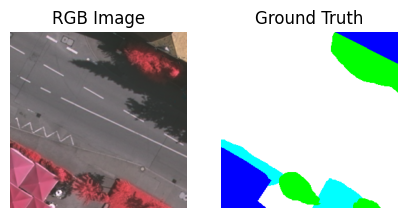

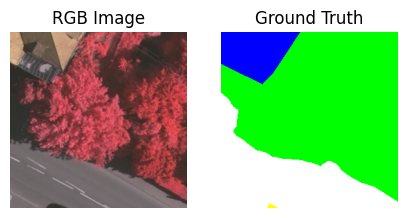

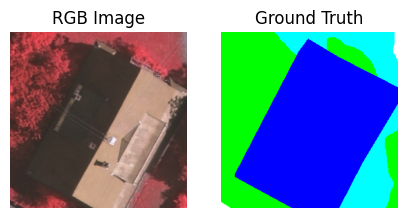

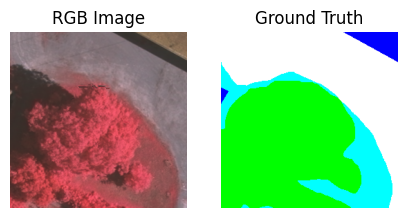

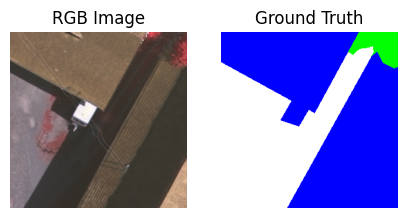

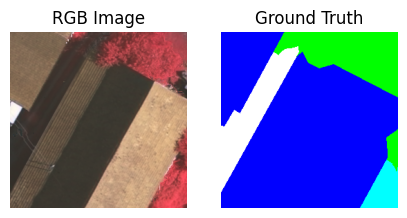

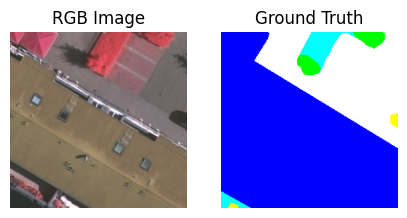

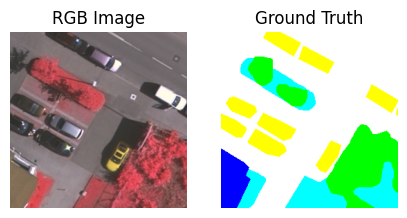

In [ ]:
imgs, labels = data_gen_train[0]
show_batch(imgs, labels, color2index)

## **U-Net with Transpose convolution**


We will use the U-Net model for multiclass semantic segmentation.

For this purpose, we have the following functions in the file **models.py**:

- **_conv_block_**: convolutional block with only multiple convolutions.
- **_downsampling_**: downsampling block with a series of convolutions, a max pooling and dropout layers.
- **_upsampling_**: upsampling block with a transpose convolution, concatenate a feature map, dropout and a series of convolutions.

For PyTorch, you can use the following U-Net implementations: [PyTorch UNet](https://github.com/milesial/Pytorch-UNet), [PyTorch Lightning UNet
](https://github.com/hiepph/unet-lightning)

_Notice that the original model has a bottleneck area with **1024** features, we are only using **512** for this assignment._

In [ ]:
unet = get_unet(img_size=PATCH_SIZE,
                n_classes=n_classes)

### **Visualization**

In [ ]:
unet.summary()

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                              

                                                                                                  
Total params: 8,557,830
Trainable params: 8,557,830
Non-trainable params: 0
__________________________________________________________________________________________________


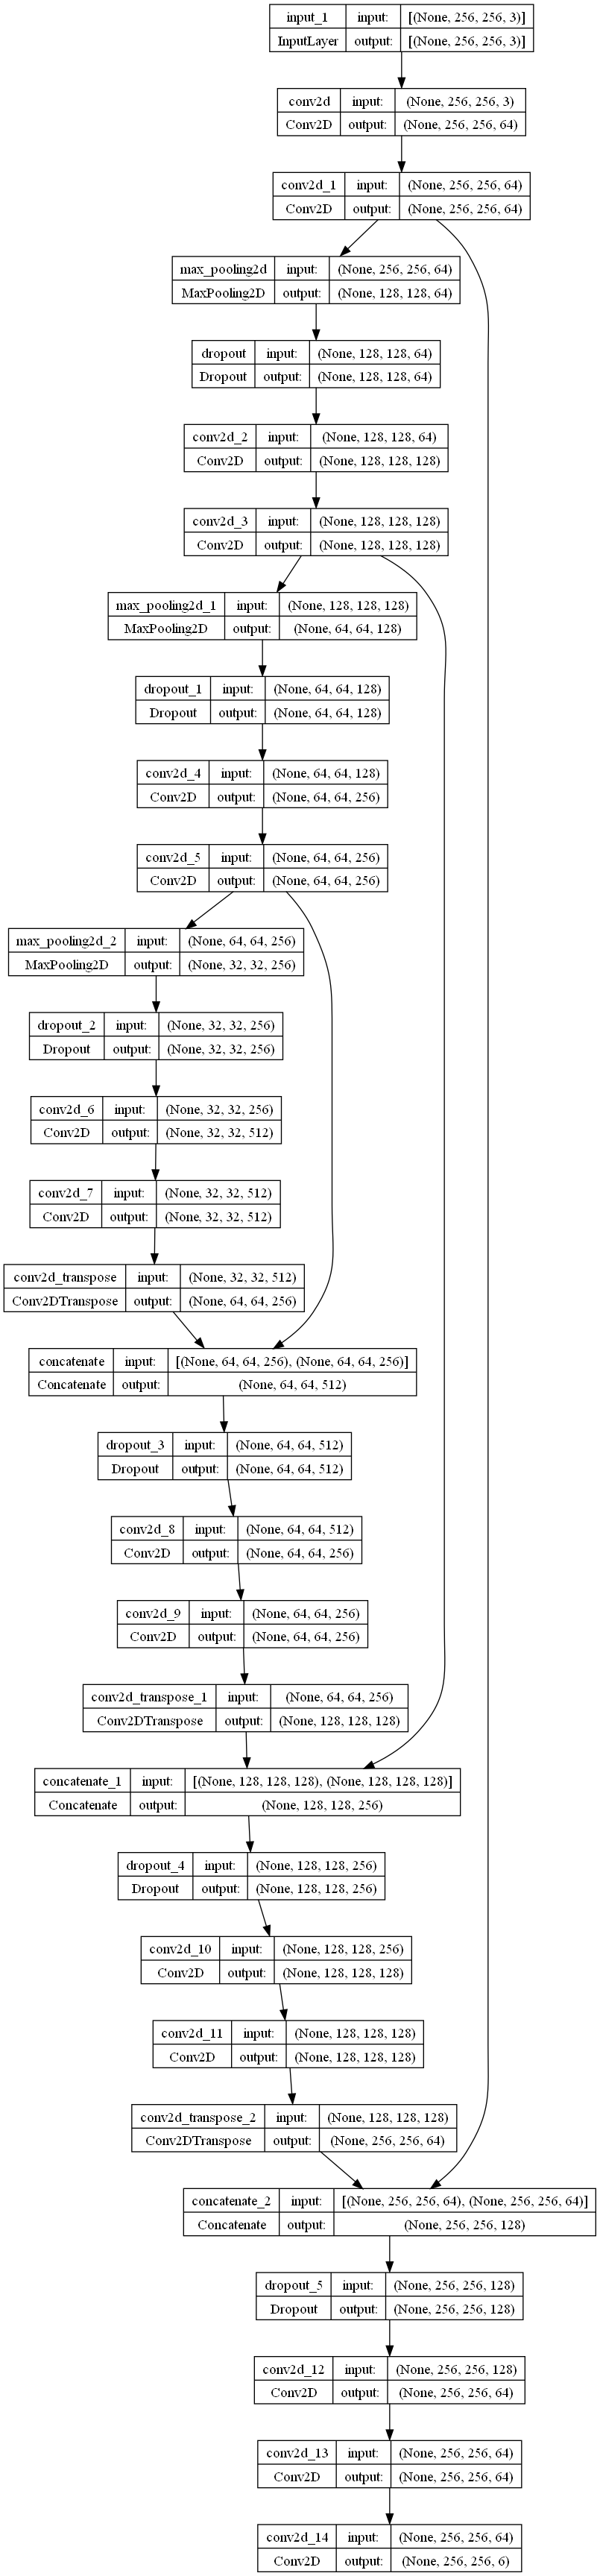

In [ ]:
plot_model(unet, to_file="unet.png", show_shapes=True)

## **Training the model**

### **Callbacks**

In [ ]:
# Callbacks
# Checkpoint
autosave = ModelCheckpoint("unet.h5",
                           mode="max",
                           save_best_only=True,
                           monitor="val_iou",
                           verbose=1)

# Early stopping
early_stopping = EarlyStopping(monitor='val_iou',
                               patience=30,
                               verbose=1,
                               mode='max')

# Tensorboard
logdir = join(PROJECT_DIR, "logs")
tensorboard = TensorBoard(logdir, histogram_freq=1)

plot_loss_1 = PlotLossesCallback()

cbks_unet = [autosave, early_stopping, tensorboard,plot_loss_1]

### **Training**

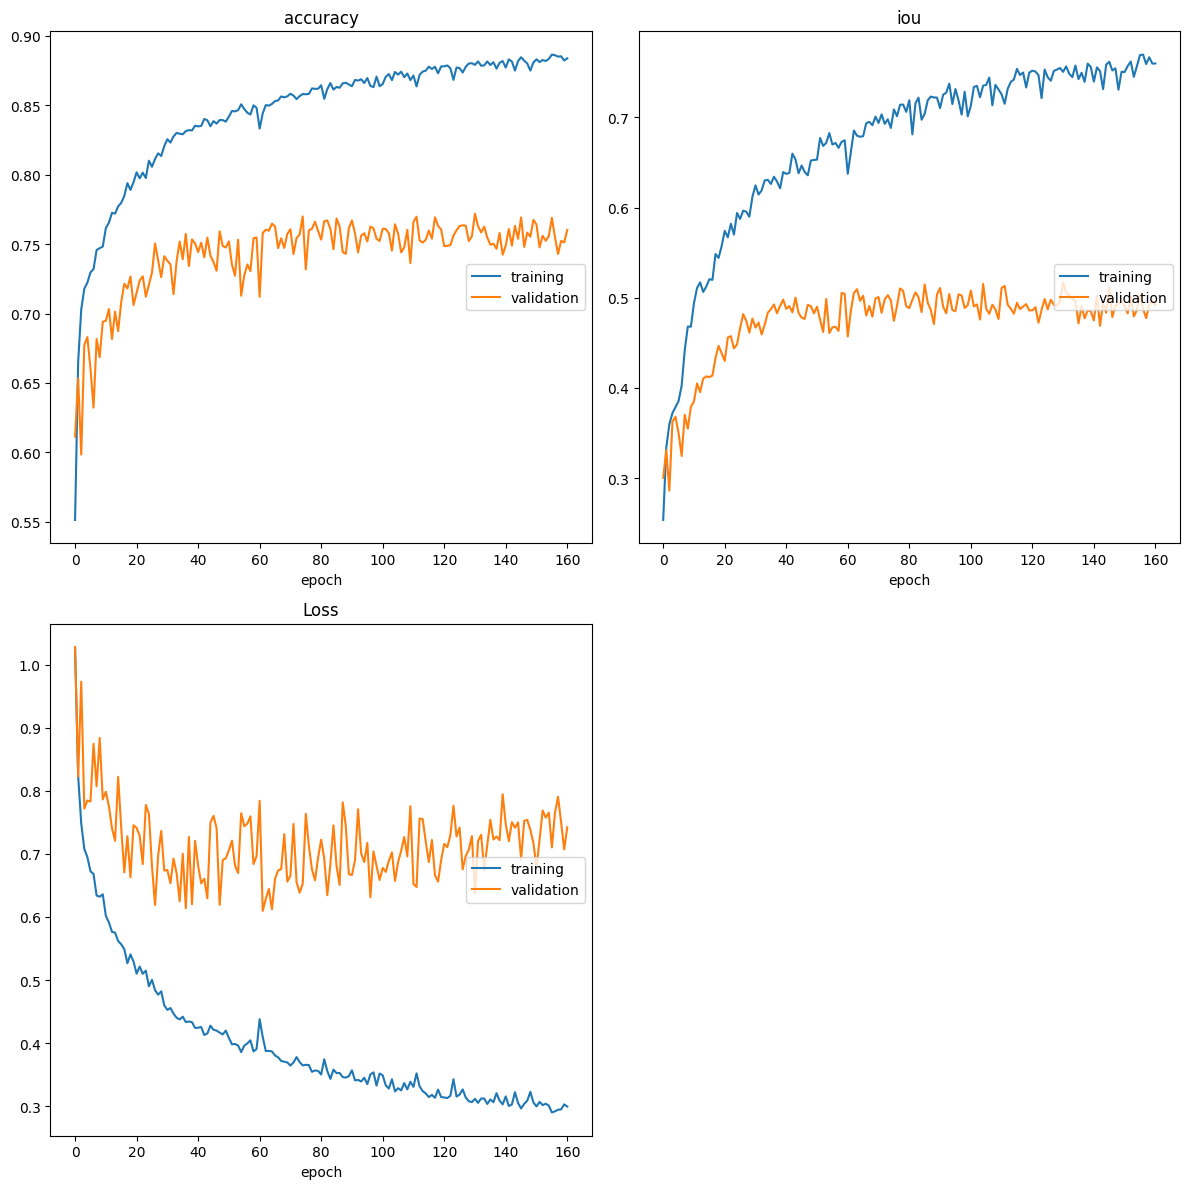

accuracy
	training         	 (min:    0.551, max:    0.886, cur:    0.884)
	validation       	 (min:    0.598, max:    0.772, cur:    0.760)
iou
	training         	 (min:    0.254, max:    0.770, cur:    0.760)
	validation       	 (min:    0.286, max:    0.518, cur:    0.492)
Loss
	training         	 (min:    0.290, max:    1.024, cur:    0.300)
	validation       	 (min:    0.610, max:    1.028, cur:    0.742)
122/122 [==============================] - 71s 547ms/step - loss: 0.2997 - accuracy: 0.8838 - iou: 0.7598 - val_loss: 0.7422 - val_accuracy: 0.7601 - val_iou: 0.4920
Epoch 161: early stopping


In [ ]:
history_unet = unet.fit(data_gen_train,
                        epochs=EPOCHS,
                        validation_data=data_gen_val,
                        callbacks=cbks_unet,
                        workers=4,
                        use_multiprocessing=True,
                        max_queue_size=20
                        )

### **TensorBoard Dev**

Upload the `logs` folder generated by TensorBoard to **TensorBoard Dev**.

For **PyTorch**, check the following links to use **TensorBoard** and **TensorBoard Dev**: [[1]](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html), [[2]](https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html)

In [ ]:
# !tensorboard dev upload --logdir logs --name "U-Net for semantic segmentation Vaihingen dataset" --one_shot

In [ ]:
!tensorboard dev upload --logdir logs --name "U-Net Trans for semantic segmentation Vaihingen dataset" --one_shot

2023-07-02 17:58:04.448476: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   BPX-NPZ-KGG



New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/rHAG

## **Testing the model**


Load the trained model

In [ ]:
unet = load_model("unet.h5")

Test your model and report the accuracies for the train, validation and test sets.

In [ ]:
data_gen_test = DataGenerator(batch_size=BATCH_SIZE,
                              patch_size=PATCH_SIZE,
                              step_size=STEP_SIZE,
                              list_top=splits["top_test"],
                              list_gts=splits["gts_test"],
                              n_classes=n_classes,
                              colormap_gt=color2index
                              )

In [ ]:


print("Train:")
scores_train = unet.evaluate(data_gen_train)

print("Validation:")
scores_val = unet.evaluate(data_gen_val)

print("Test:")
scores_test = unet.evaluate(data_gen_test)

Train:
122/122 [==============================] - 31s 225ms/step - loss: 0.2809 - accuracy: 0.8909 - iou: 0.7685
Validation:
44/44 [==============================] - 13s 302ms/step - loss: 0.6372 - accuracy: 0.7719 - iou: 0.5175
Test:
190/190 [==============================] - 48s 254ms/step - loss: 0.5964 - accuracy: 0.8048 - iou: 0.5539


1/1 [==============================] - 0s 167ms/step


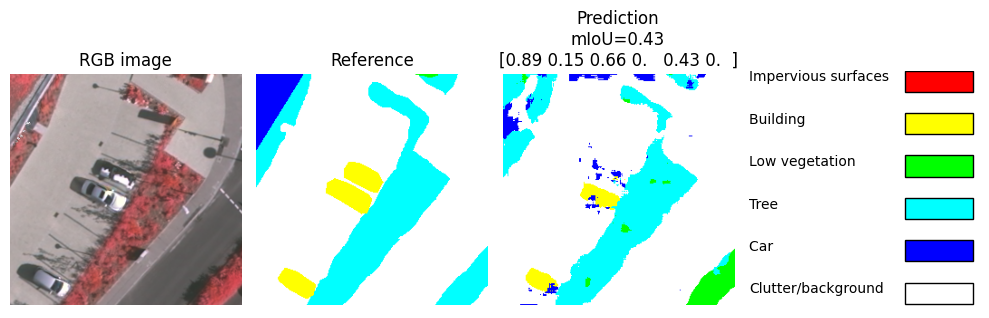

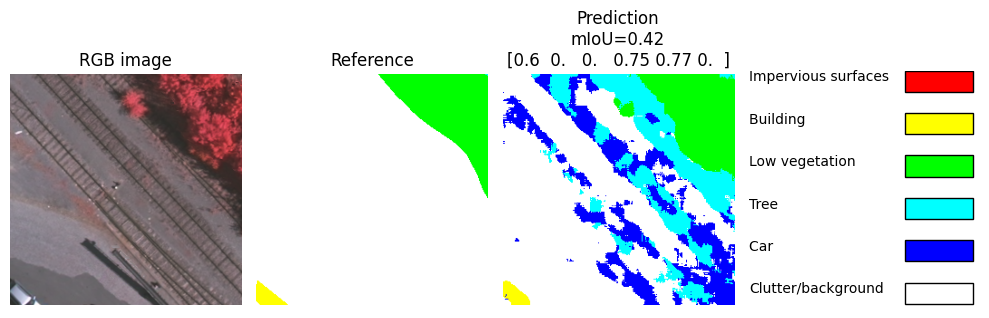

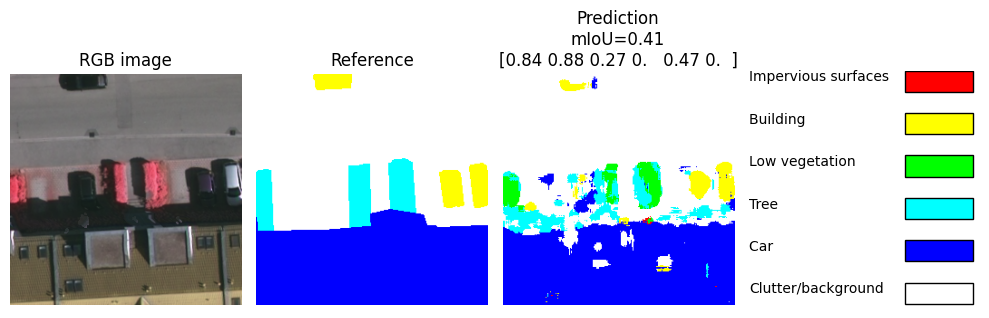

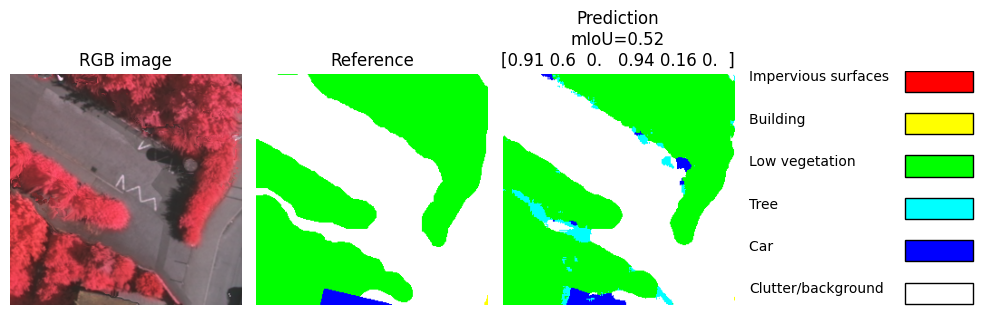

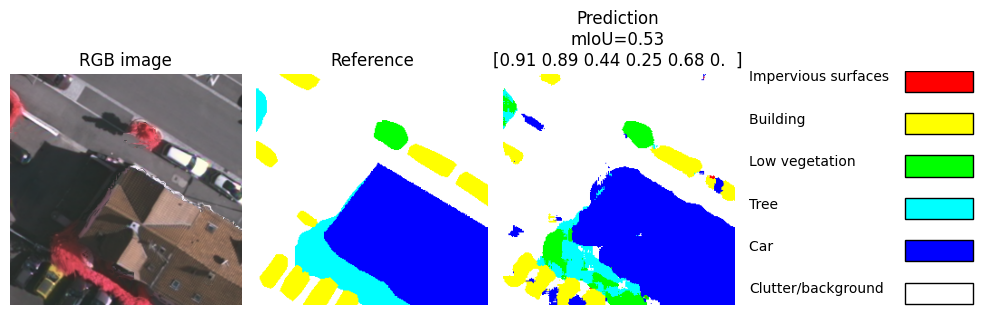

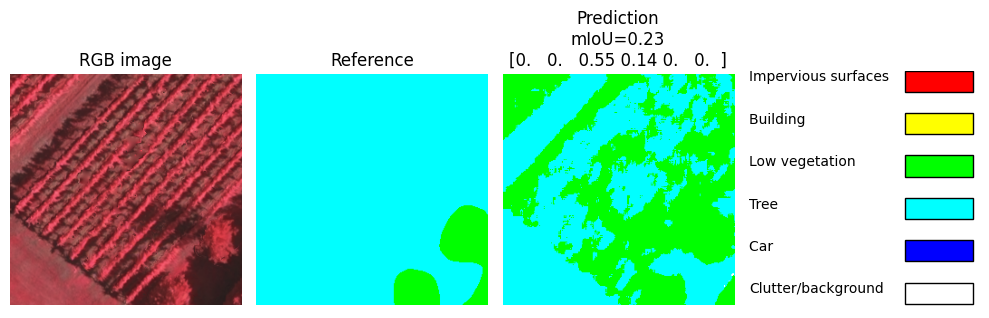

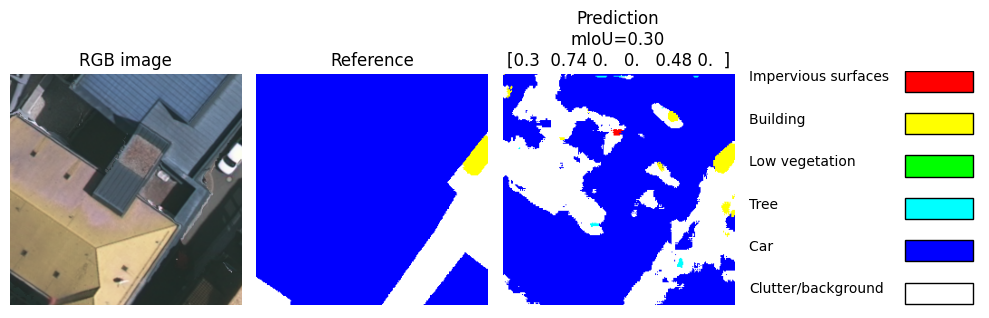

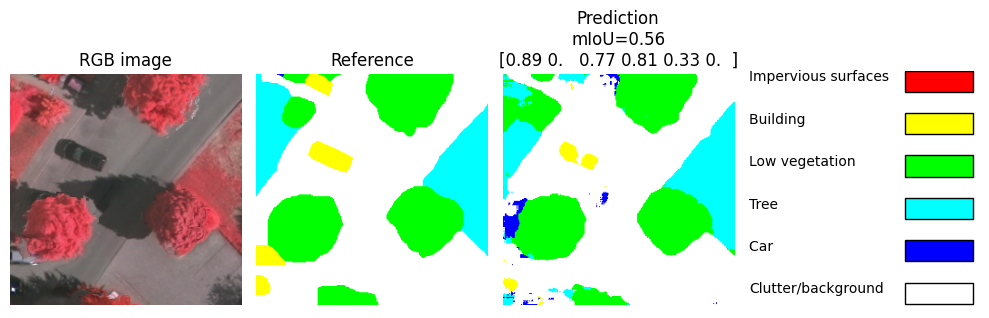

In [ ]:
#@title **Predictions Visualization** { run: "auto"}
#@markdown Select a sample
id_batch = 101 #@param {type:"slider", min:0, max:189, step:1}

# Get a batch from the generator for testing
x,y = data_gen_test.__getitem__(id_batch)
# Obtain the prediction from the trained model
prediction = unet.predict(x)
# Iterate over each sample in the batch
for x_i,y_i,pred_i in zip(x,y,prediction):
  # For visualization: [0,1] => [0,255]
  x_i = x_i*255
  x_i = x_i.astype(np.uint8)
  # From one hot encoding to integer
  gt = np.argmax(y_i, axis=-1)
  pred = np.argmax(pred_i, axis=-1)
  # Object to compute the mean IoU
  m_iou = OneHotMeanIoU(num_classes=n_classes)
  m_iou.update_state(y_true=y_i,
                     y_pred=pred_i)
  # List to storage IoU per class
  iou_all = []
  for id_class in range(n_classes):
    # Object to compute the IoU for each class
    m_iou_class = OneHotIoU(num_classes=n_classes,
                            target_class_ids=[id_class])
                            # target_class_ids=[0,1,2,3,4,5])
    m_iou_class.update_state(y_true=y_i,
                             y_pred=pred_i)
    # Save IoU for each class
    iou_all.append(m_iou_class.result().numpy())
  # Color images for the Ground Truth and Prediction
  gt_rgb = np.zeros((gt.shape[0],gt.shape[1],3), dtype=np.uint8)
  pred_rgb = np.zeros((gt.shape[0],gt.shape[1],3), dtype=np.uint8)
  # Assign a color to each integer value from the given dictionary
  for key,value in color2index.items():
    gt_rgb[gt==value] = key
    pred_rgb[pred==value] = key
  # Visualization
  plt.figure(figsize=(10,3))
  plt.subplot(1,4,1)
  plt.imshow(x_i)
  plt.title("RGB image")
  plt.axis("off")

  plt.subplot(1,4,2)
  plt.imshow(gt_rgb)
  plt.title("Reference")
  plt.axis("off")

  plt.subplot(1,4,3)
  plt.imshow(pred_rgb)
  plt.title("Prediction\nmIoU={:.2f}\n{}".format(m_iou.result().numpy(),
                                                 np.round(iou_all, decimals=2)))
  plt.axis("off")

  g = plt.subplot(1,4,4)
  g.axes.set_xlim(0,3.4)
  g.axes.set_ylim(-0.01,0.55)

  g.text(0, 0.025, "Clutter/background")
  g.text(0, 0.125, "Car ")
  g.text(0, 0.225, "Tree ")
  g.text(0, 0.325, "Low vegetation")
  g.text(0, 0.425, "Building ")
  g.text(0, 0.525, "Impervious surfaces")

  x_rec = 2.3
  g.add_patch(patches.Rectangle((x_rec,0.0), 1, 0.05, facecolor="#FFFFFF", edgecolor="black"))
  g.add_patch(patches.Rectangle((x_rec,0.1), 1, 0.05, facecolor="#0000FF", edgecolor="black"))
  g.add_patch(patches.Rectangle((x_rec,0.2), 1, 0.05, facecolor="#00FFFF", edgecolor="black"))
  g.add_patch(patches.Rectangle((x_rec,0.3), 1, 0.05, facecolor="#00FF00", edgecolor="black"))
  g.add_patch(patches.Rectangle((x_rec,0.4), 1, 0.05, facecolor="#FFFF00", edgecolor="black"))
  g.add_patch(patches.Rectangle((x_rec,0.5), 1, 0.05, facecolor="#FF0000", edgecolor="black"))
  g.axis("off")

  plt.tight_layout()

  plt.show()

In [ ]:
# Create a table with the evaluation results
table_data = [
    ["Train", *scores_train],
    ["Validation", *scores_val],
    ["Test", *scores_test]
]

table_headers = ["Set", "Loss", "Accuracy","iou"]

# Print the table
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))

+------------+----------+------------+----------+
| Set        |     Loss |   Accuracy |      iou |
+============+==========+============+==========+
| Train      | 0.280912 |   0.890901 | 0.76849  |
+------------+----------+------------+----------+
| Validation | 0.637174 |   0.771895 | 0.517504 |
+------------+----------+------------+----------+
| Test       | 0.5964   |   0.804821 | 0.553881 |
+------------+----------+------------+----------+


## Unet with Unpooling

In [ ]:
unet_unp = get_unet(img_size=PATCH_SIZE,
                n_classes=n_classes)

### **Visualization**

In [ ]:
unet_unp.summary()

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                              

Total params: 7,783,238
Trainable params: 7,783,238
Non-trainable params: 0
__________________________________________________________________________________________________


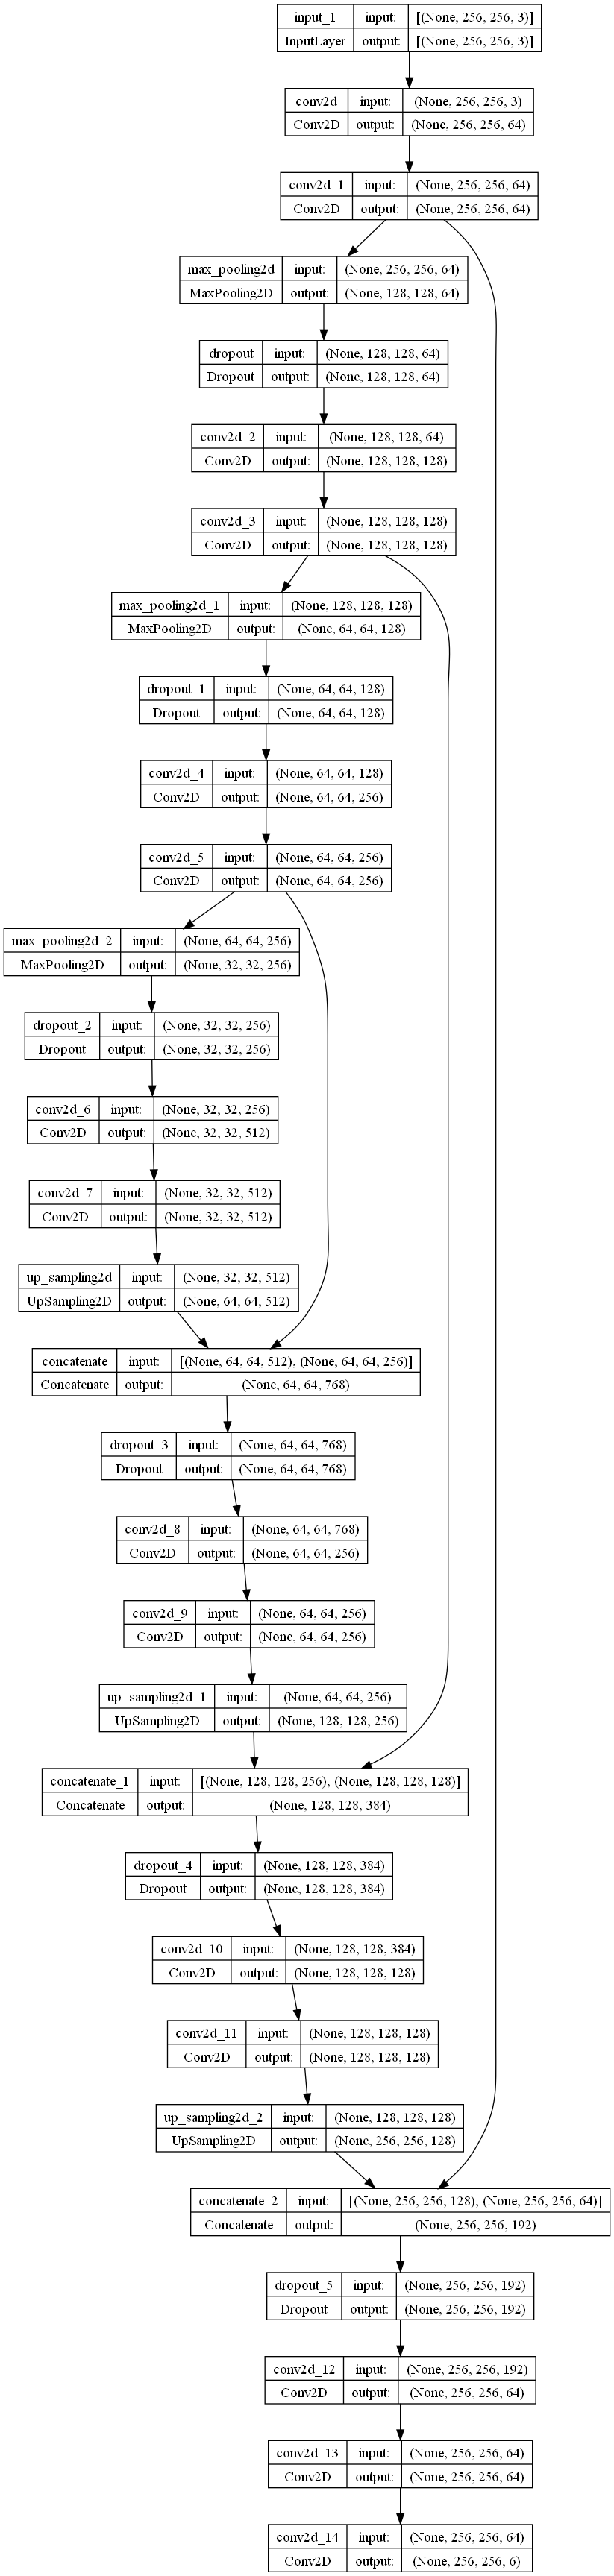

In [ ]:
plot_model(unet_unp, to_file="unet_unp.png", show_shapes=True)

### **Callbacks**

In [ ]:
# Callbacks
# Checkpoint
autosave = ModelCheckpoint("unet_unp.h5",
                           mode="max",
                           save_best_only=True,
                           monitor="val_iou",
                           verbose=1)

# Early stopping
early_stopping = EarlyStopping(monitor='val_iou',
                               patience=30,
                               verbose=1,
                               mode='max')

# Tensorboard
logdir = join(PROJECT_DIR, "logs_unp")
tensorboard = TensorBoard(logdir, histogram_freq=1)
plot_loss_1 = PlotLossesCallback()

cbks_unet = [autosave, early_stopping, tensorboard,plot_loss_1]

### **Training**

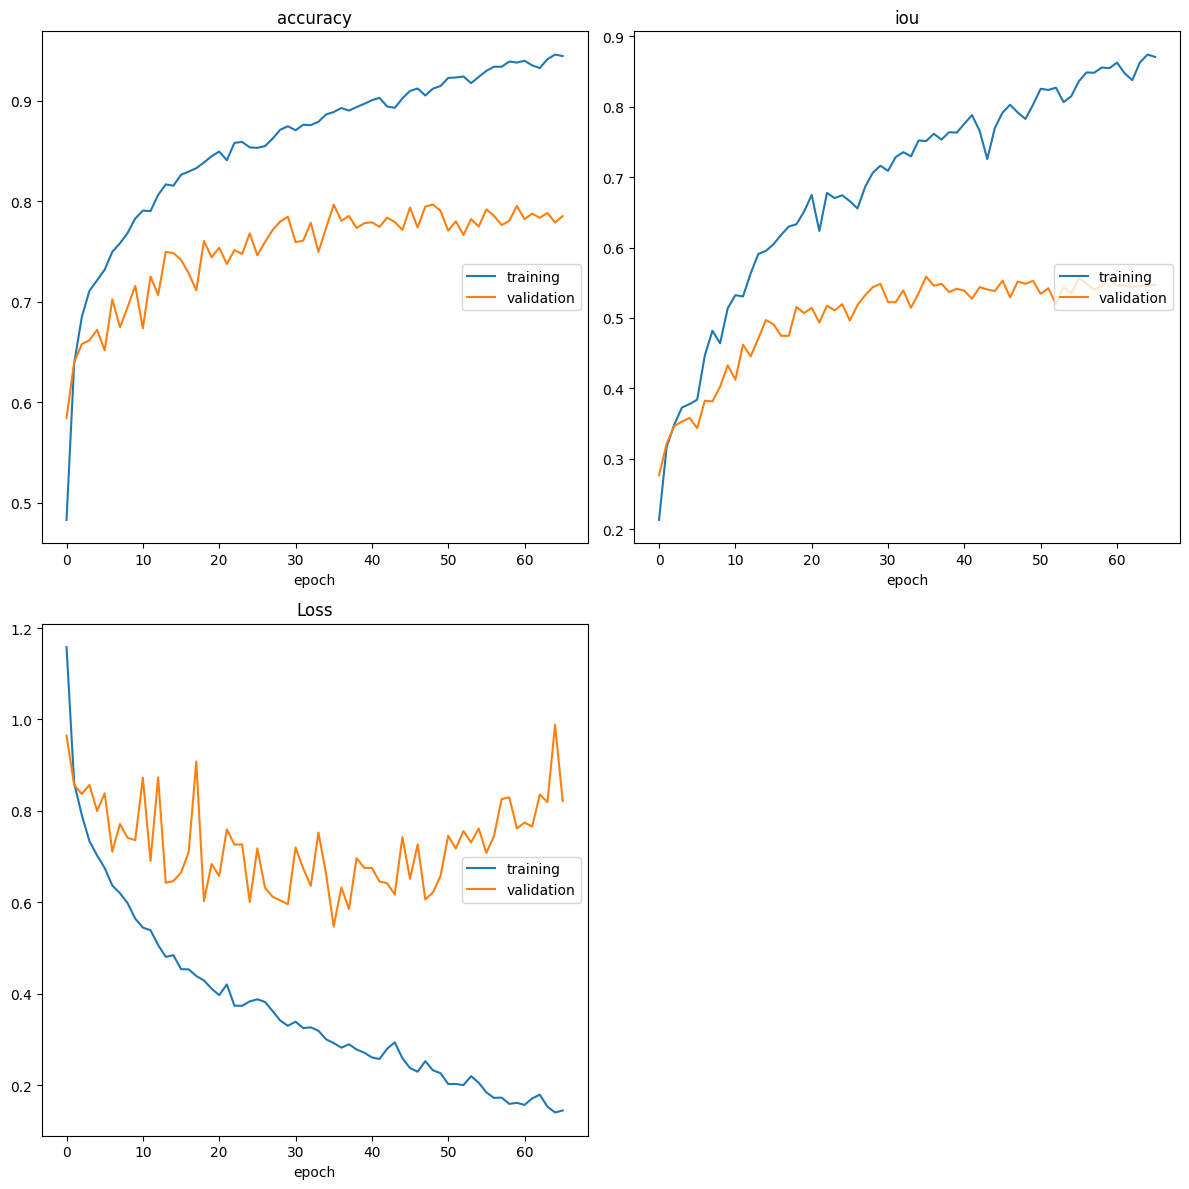

accuracy
	training         	 (min:    0.483, max:    0.946, cur:    0.944)
	validation       	 (min:    0.584, max:    0.797, cur:    0.785)
iou
	training         	 (min:    0.213, max:    0.874, cur:    0.871)
	validation       	 (min:    0.276, max:    0.559, cur:    0.547)
Loss
	training         	 (min:    0.140, max:    1.158, cur:    0.145)
	validation       	 (min:    0.547, max:    0.988, cur:    0.821)
122/122 [==============================] - 70s 538ms/step - loss: 0.1446 - accuracy: 0.9442 - iou: 0.8707 - val_loss: 0.8215 - val_accuracy: 0.7850 - val_iou: 0.5472
Epoch 66: early stopping


In [ ]:
history_unet_unp = unet_unp.fit(data_gen_train,
                        epochs=EPOCHS,
                        validation_data=data_gen_val,
                        callbacks=cbks_unet,
                        workers=4,
                        use_multiprocessing=True,
                        max_queue_size=20
                        )

In [ ]:
unet_unp = load_model("unet_unp.h5")


In [ ]:
unet_unp.summary()

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                              

Total params: 7,783,238
Trainable params: 7,783,238
Non-trainable params: 0
__________________________________________________________________________________________________


In [ ]:
print("Train:")
scores_train_unp = unet_unp.evaluate(data_gen_train)

print("Validation:")
scores_val_unp = unet_unp.evaluate(data_gen_val)

print("Test:")
scores_test_unp = unet_unp.evaluate(data_gen_test)

Train:
122/122 [==============================] - 32s 256ms/step - loss: 0.2591 - accuracy: 0.9019 - iou: 0.7770
Validation:
44/44 [==============================] - 13s 291ms/step - loss: 0.5469 - accuracy: 0.7965 - iou: 0.5586
Test:
190/190 [==============================] - 57s 300ms/step - loss: 0.5511 - accuracy: 0.8257 - iou: 0.5720


In [ ]:
# Create a table with the evaluation results
table_data_unp = [
    ["Train", *scores_train_unp],
    ["Validation", *scores_val_unp],
    ["Test", *scores_test_unp]
]

table_headers = ["Set", "Loss", "Accuracy","iou"]

# Print the table
print(tabulate(table_data_unp, headers=table_headers, tablefmt="grid"))

+------------+----------+------------+----------+
| Set        |     Loss |   Accuracy |      iou |
+============+==========+============+==========+
| Train      | 0.259088 |   0.901868 | 0.777048 |
+------------+----------+------------+----------+
| Validation | 0.546865 |   0.796465 | 0.558601 |
+------------+----------+------------+----------+
| Test       | 0.551094 |   0.82574  | 0.571996 |
+------------+----------+------------+----------+


1/1 [==============================] - 0s 200ms/step


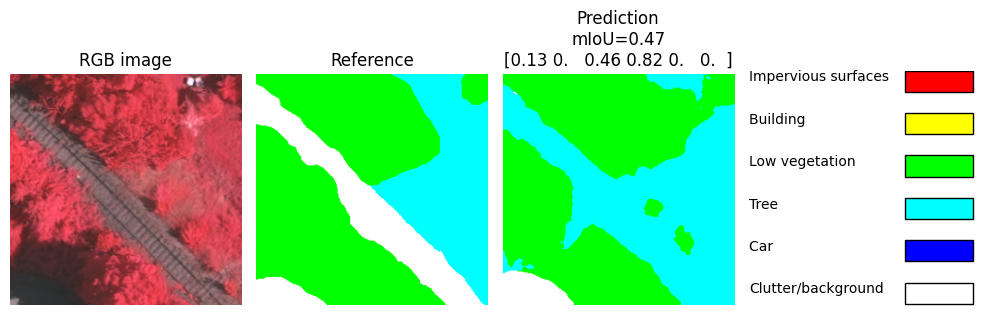

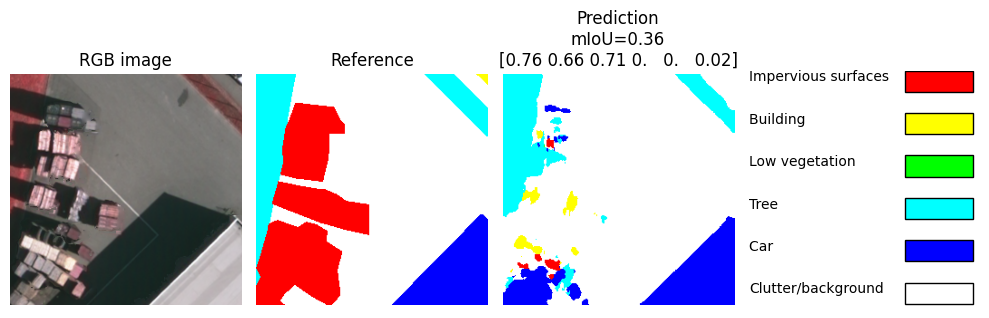

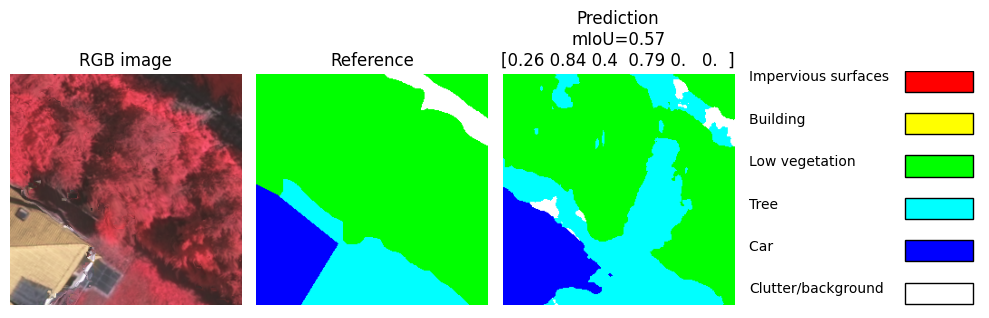

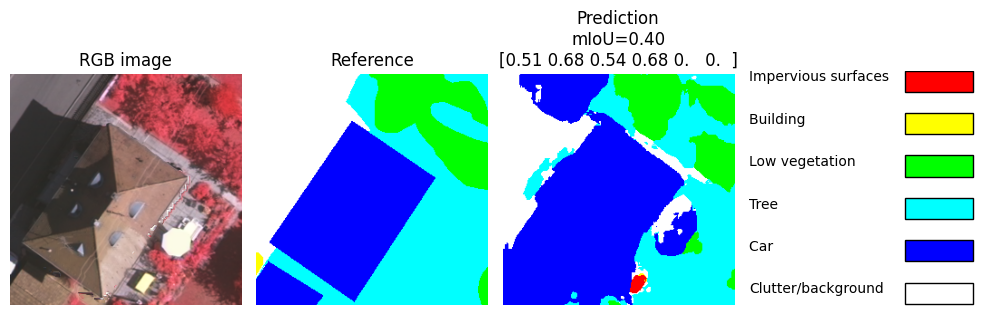

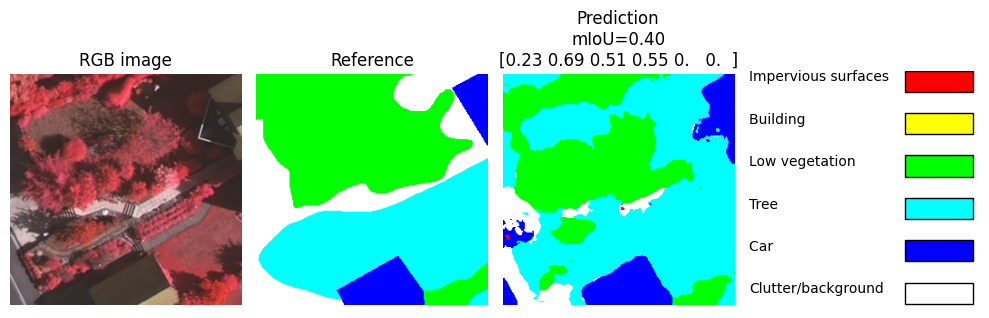

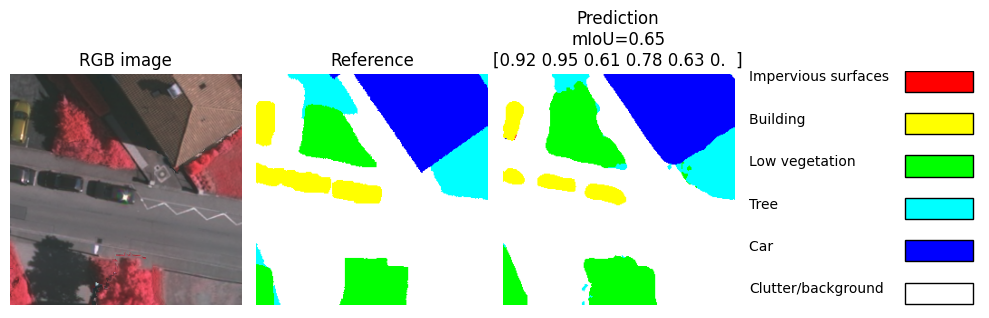

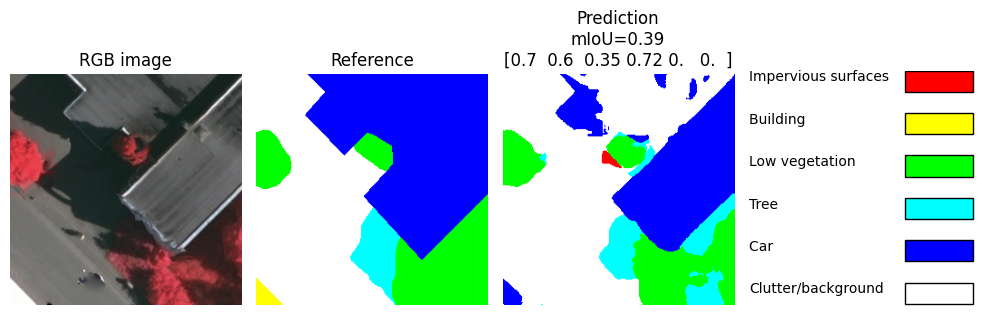

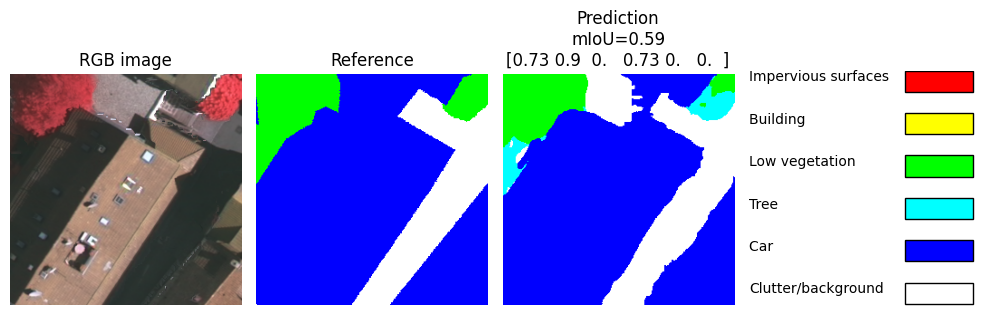

In [ ]:
#@title **Predictions Visualization** { run: "auto"}
#@markdown Select a sample
id_batch = 101 #@param {type:"slider", min:0, max:189, step:1}

# Get a batch from the generator for testing
x,y = data_gen_test.__getitem__(id_batch)
# Obtain the prediction from the trained model
prediction = unet_unp.predict(x)
# Iterate over each sample in the batch
for x_i,y_i,pred_i in zip(x,y,prediction):
  # For visualization: [0,1] => [0,255]
  x_i = x_i*255
  x_i = x_i.astype(np.uint8)
  # From one hot encoding to integer
  gt = np.argmax(y_i, axis=-1)
  pred = np.argmax(pred_i, axis=-1)
  # Object to compute the mean IoU
  m_iou = OneHotMeanIoU(num_classes=n_classes)
  m_iou.update_state(y_true=y_i,
                     y_pred=pred_i)
  # List to storage IoU per class
  iou_all = []
  for id_class in range(n_classes):
    # Object to compute the IoU for each class
    m_iou_class = OneHotIoU(num_classes=n_classes,
                            target_class_ids=[id_class])
                            # target_class_ids=[0,1,2,3,4,5])
    m_iou_class.update_state(y_true=y_i,
                             y_pred=pred_i)
    # Save IoU for each class
    iou_all.append(m_iou_class.result().numpy())
  # Color images for the Ground Truth and Prediction
  gt_rgb = np.zeros((gt.shape[0],gt.shape[1],3), dtype=np.uint8)
  pred_rgb = np.zeros((gt.shape[0],gt.shape[1],3), dtype=np.uint8)
  # Assign a color to each integer value from the given dictionary
  for key,value in color2index.items():
    gt_rgb[gt==value] = key
    pred_rgb[pred==value] = key
  # Visualization
  plt.figure(figsize=(10,3))
  plt.subplot(1,4,1)
  plt.imshow(x_i)
  plt.title("RGB image")
  plt.axis("off")

  plt.subplot(1,4,2)
  plt.imshow(gt_rgb)
  plt.title("Reference")
  plt.axis("off")

  plt.subplot(1,4,3)
  plt.imshow(pred_rgb)
  plt.title("Prediction\nmIoU={:.2f}\n{}".format(m_iou.result().numpy(),
                                                 np.round(iou_all, decimals=2)))
  plt.axis("off")

  g = plt.subplot(1,4,4)
  g.axes.set_xlim(0,3.4)
  g.axes.set_ylim(-0.01,0.55)

  g.text(0, 0.025, "Clutter/background")
  g.text(0, 0.125, "Car ")
  g.text(0, 0.225, "Tree ")
  g.text(0, 0.325, "Low vegetation")
  g.text(0, 0.425, "Building ")
  g.text(0, 0.525, "Impervious surfaces")

  x_rec = 2.3
  g.add_patch(patches.Rectangle((x_rec,0.0), 1, 0.05, facecolor="#FFFFFF", edgecolor="black"))
  g.add_patch(patches.Rectangle((x_rec,0.1), 1, 0.05, facecolor="#0000FF", edgecolor="black"))
  g.add_patch(patches.Rectangle((x_rec,0.2), 1, 0.05, facecolor="#00FFFF", edgecolor="black"))
  g.add_patch(patches.Rectangle((x_rec,0.3), 1, 0.05, facecolor="#00FF00", edgecolor="black"))
  g.add_patch(patches.Rectangle((x_rec,0.4), 1, 0.05, facecolor="#FFFF00", edgecolor="black"))
  g.add_patch(patches.Rectangle((x_rec,0.5), 1, 0.05, facecolor="#FF0000", edgecolor="black"))
  g.axis("off")

  plt.tight_layout()

  plt.show()

In [ ]:
unet_unp.metrics_names

In [ ]:
!tensorboard dev upload --logdir logs_unp --name "U-Net upsam for semantic segmentation Vaihingen dataset" --one_shot

2023-07-02 17:59:59.985954: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/lavRjjyDQT2QTeNXF3ayPw/

[2023-07-02T18:00:02] Started scanning logdir.
[2023-07-02T18:00:07] Total uploaded: 594 scalars, 1980 tensors (1.4 MB), 1 binary objects (155.2 kB)
[2023-07-02T18:00:07] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/lavRjjyDQT2QTeNXF3ayPw/


In [ ]:
from scipy import stats

t_statistic, p_value = stats.ttest_rel(scores_test, scores_test_unp)

In [ ]:
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 0.09669539254861718
P-Value: 0.9317852981419168


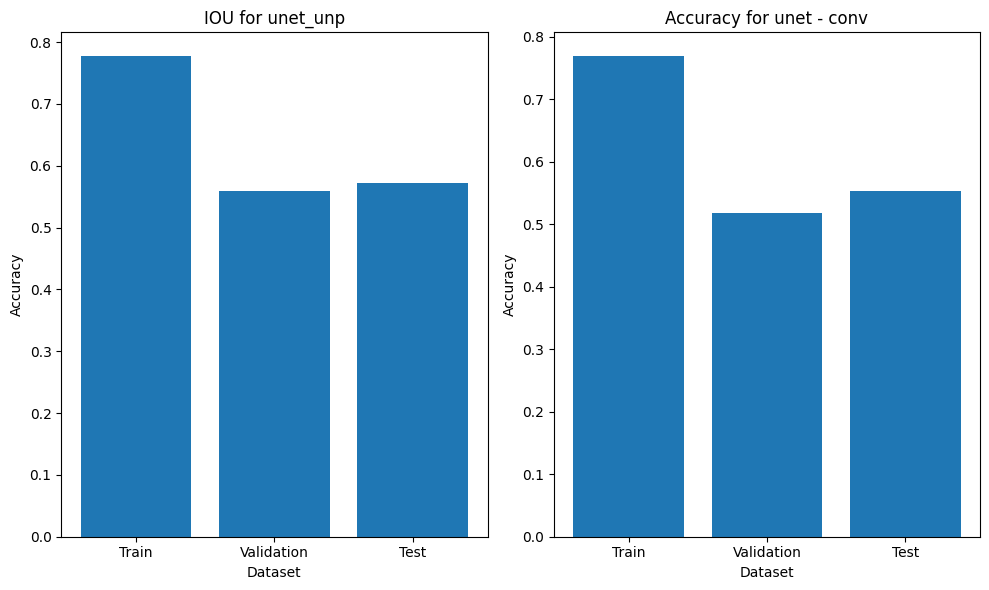

In [ ]:
import matplotlib.pyplot as plt

# Define the labels and scores for each model
labels = ['Train', 'Validation', 'Test']
scores_unp_acc = [scores_train_unp[2], scores_val_unp[2], scores_test_unp[2]]
scores_acc = [scores_train[2], scores_val[2], scores_test[2]]

# Create a bar plot for unet_unp
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(labels, scores_unp_acc)
plt.title('IOU for unet_unp')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')

# Create a bar plot for unet
plt.subplot(1, 2, 2)
plt.bar(labels, scores_acc)
plt.title('Accuracy for unet - conv')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
